In [19]:


import numpy as np

random_seed = 42
num_slices = 2
experiment_folder = f"./output/LAA_original-{num_slices}/{random_seed}"
target_folder = experiment_folder 
module_folder = experiment_folder + "/module_final"

data = np.load(target_folder + "/module_final/target/combined_out.npy")

all_V = data[:,:,0]
Voltage = data[0,:,0]
lto_hto = data[:,1,2]





In [20]:
np.save("lto_hto.npy",Voltage)

In [21]:
from act.DataProcessor import DataProcessor
from act.act_types import ConstantCurrentInjection


CI_settings = [ConstantCurrentInjection(amp=0.040,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.045,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.050,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.055,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.060,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.0,dur=400,delay=100),
                ConstantCurrentInjection(amp=0.1,dur=400,delay=100),
                ConstantCurrentInjection(amp=0.2,dur=400,delay=100),
                ConstantCurrentInjection(amp=0.3,dur=400,delay=100),
                ConstantCurrentInjection(amp=0.4,dur=400,delay=100),
                ConstantCurrentInjection(amp=4.5,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=5.0,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=5.5,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=6.0,dur=400,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=6.5,dur=400,delay=100, lto_hto=1)]

dp = DataProcessor()

lto_hto_stats = dp.get_hto_lto_stats(all_V,lto_hto=lto_hto,train_features=["lto-hto_frequency","lto-hto_amplitude"],dt=0.1 ,CI_settings=CI_settings)
lto_hto_stats

start, end: 1000, 5000
(Min, Max): (-70.41616736211476,-64.60467367646719)
amplitude: 5.8114936856475765
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,-63.75911269216587)
amplitude: 6.6570546699488915
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,-62.781631424201585)
amplitude: 7.634535937913178
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,-61.53793982159758)
amplitude: 8.87822754051718
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,-59.34164130402506)
amplitude: 11.074526058089702
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,40.21169052646969)
amplitude: 110.62785788858446
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,40.72043608490755)
amplitude: 111.13660344702231
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,41.17008438756648)
amplitude: 111.58625174968125
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,41.62003753738446)
amplitude: 112.03620489949923
start, end: 1000, 5000
(Min, Max): (-70.41616736211476,42.038

(array([[7.50000000e-03, 5.81149369e+00],
        [7.50000000e-03, 6.65705467e+00],
        [7.50000000e-03, 7.63453594e+00],
        [7.50000000e-03, 8.87822754e+00],
        [7.50000000e-03, 1.10745261e+01],
        [1.00000000e+06, 1.00000000e+06],
        [1.00000000e+06, 1.00000000e+06],
        [1.00000000e+06, 1.00000000e+06],
        [1.00000000e+06, 1.00000000e+06],
        [1.00000000e+06, 1.00000000e+06],
        [2.50000000e-03, 1.10627858e+02],
        [2.50000000e-03, 1.11136603e+02],
        [2.50000000e-03, 1.11586252e+02],
        [2.50000000e-03, 1.12036205e+02],
        [2.50000000e-03, 1.12454711e+02]]),
 ['lto-hto_frequency', 'lto-hto_amplitude'])

11.074526058089702


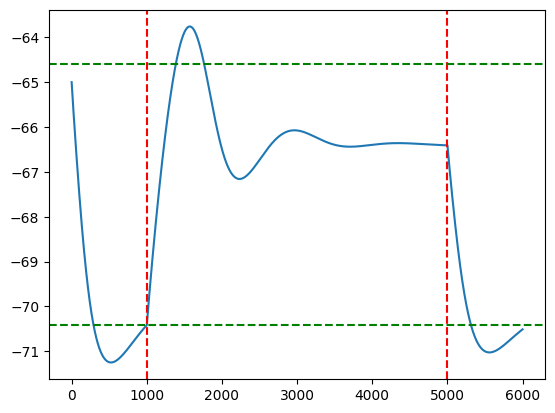

In [28]:
import matplotlib.pyplot as plt

print(-59.34164130402506 - -70.41616736211476 )

plt.plot(Voltage)
plt.axvline(x=1000, color='red', linestyle='--')
plt.axvline(x=5000, color='red', linestyle='--')

plt.axhline(y=-70.41616736211476, color='green', linestyle='--')
plt.axhline(y=-64.60467367646719, color='green', linestyle='--')

In [29]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Find peaks
peak_indices, _ = find_peaks(Voltage)

# Print indices of the peaks
print("Indices of peaks:", peak_indices)

period = 2994 - 1566
period_ms = period/10
print(f"period_ms: {period_ms}")
freq = 1/period_ms
freq

Indices of peaks: [1572 2963 4345]
period_ms: 142.8


0.007002801120448179

11.074526058089702


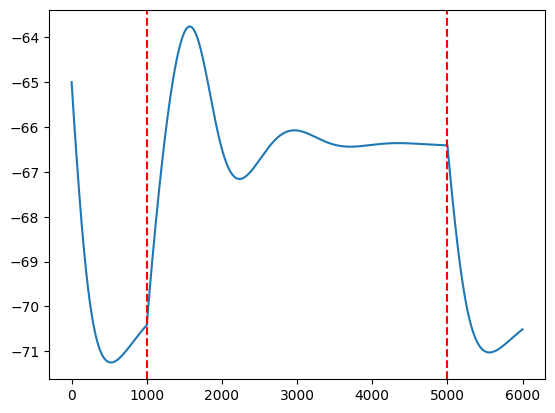

In [24]:
import matplotlib.pyplot as plt

print(-59.34164130402506 - -70.41616736211476 )

Voltage_2 = Voltage = data[1,:,0]

plt.plot(Voltage_2)
plt.axvline(x=1000, color='red', linestyle='--')
plt.axvline(x=5000, color='red', linestyle='--')

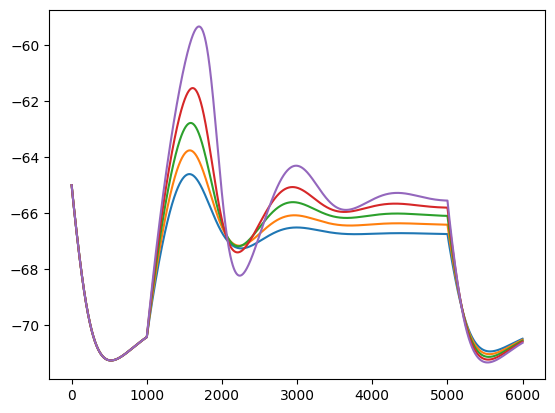

In [25]:
plt.plot(data[0,:,0])
plt.plot(data[1,:,0])
plt.plot(data[2,:,0])
plt.plot(data[3,:,0])
plt.plot(data[4,:,0])


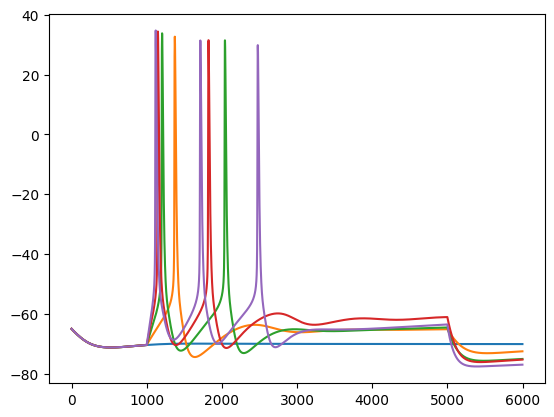

In [26]:
plt.plot(data[5,:,0])
plt.plot(data[6,:,0])
plt.plot(data[7,:,0])
plt.plot(data[8,:,0])
plt.plot(data[9,:,0])

In [27]:
def calculate_hto_lto_frequency(V, CI_settings, dt, lto_hto):
    frequencies = []
    for i, v_trace in enumerate(V):
        if lto_hto[i] == 1:
            start_time = CI_settings[i].delay
            stop_time = CI_settings[i].delay + CI_settings[i].dur
            start_idx = int(np.round(start_time / dt))
            end_idx = int(np.round(stop_time / dt))
            end_idx = min(end_idx, len(v_trace))

            window = v_trace[start_idx:end_idx]

            samples = len(window)

            fft_result = np.fft.rfft(window)
            print(f"fft_result: {fft_result}")
            fft_magnitude = np.abs(fft_result)
            print(f"fft_magnitude: {fft_magnitude}")

            freqs = np.fft.rfftfreq(samples, d=dt)
            
            print(f"freqs: {freqs}")

            if freqs[0] == 0:
                fft_magnitude[0] = 0

            max_index = np.argmax(fft_magnitude)
            print(f"max_index: {max_index}")

            principal_freq = freqs[max_index]
            print(f"principal-freq: {principal_freq}")
            frequencies.append(principal_freq)
        else:
            frequencies.append(1e6)

    return np.array(frequencies)

calculate_hto_lto_frequency(all_V,dt=0.1 ,CI_settings=CI_settings, lto_hto=lto_hto)

fft_result: [-2.66419905e+05+0.00000000e+00j  1.66544631e+02-5.28983360e+02j
 -4.25734662e+02-9.09510282e+02j ... -1.84176017e+00+2.88535623e-03j
 -1.84176017e+00+1.44267666e-03j -1.84176016e+00+0.00000000e+00j]
fft_magnitude: [2.66419905e+05 5.54581382e+02 1.00422057e+03 ... 1.84176243e+00
 1.84176073e+00 1.84176016e+00]
freqs: [0.0000e+00 2.5000e-03 5.0000e-03 ... 4.9950e+00 4.9975e+00 5.0000e+00]
max_index: 3
principal-freq: 0.0075
fft_result: [-2.64936710e+05+0.00000000e+00j  2.80882574e+02-6.13062100e+02j
 -3.77283855e+02-1.14107002e+03j ... -2.00919003e+00+3.14750400e-03j
 -2.00919002e+00+1.57375275e-03j -2.00919002e+00+0.00000000e+00j]
fft_magnitude: [2.64936710e+05 6.74344244e+02 1.20182523e+03 ... 2.00919250e+00
 2.00919063e+00 2.00919002e+00]
freqs: [0.0000e+00 2.5000e-03 5.0000e-03 ... 4.9950e+00 4.9975e+00 5.0000e+00]
max_index: 3
principal-freq: 0.0075
fft_result: [-2.63460164e+05+0.00000000e+00j  4.36224596e+02-7.26141176e+02j
 -3.09361951e+02-1.43578970e+03j ... -2.16683

array([7.5e-03, 7.5e-03, 7.5e-03, 7.5e-03, 7.5e-03, 1.0e+06, 1.0e+06,
       1.0e+06, 1.0e+06, 1.0e+06, 2.5e-03, 2.5e-03, 2.5e-03, 2.5e-03,
       2.5e-03])